In [13]:
from T4MLTraining import *

In [19]:
# Builder
dat = 'trips_simpler.csv'
bin_ = '40T'
company = [2,3,4,5]
location = [mk for mk in range(9)]
company_test = [2]
location_test = [mk for mk in range(9)]
frame_in = binToWindows(bin_)
frame_out = 2
ratio = 0.8

In [20]:
# Data Preparation
tr = DataPrep(dat, company, location, company_test, location_test, bin_, frame_out, ratio)
tr.setup()

inp_train, out_train, inp_test, out_test = tr.extract()
del tr

[2, 3, 4, 5] [0, 1, 2, 3, 4, 5, 6, 7, 8] | Sum of all datalist: 14572068 | Sum of all tested: 118692


Training time: 352.52370524406433 seconds.


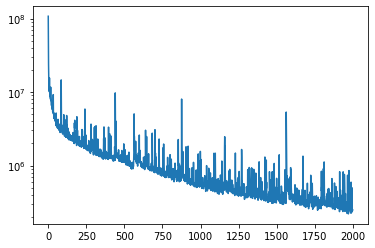

In [21]:
# Model building and training
model_1 = CNNLSTM(frame_in, frame_out, epochs=2000)
model_1.setData(inp_train,array(out_train))
ts = time.time()
model_1.train()
te = time.time()
print("Training time: " + str(te - ts) + " seconds.")
model_1.drawLoss()


In [22]:
# Prediction

pred_train = Prediction(inp_train, out_train, model_1, frame_in, frame_out)
pred_train.predict()
pred_train.summary("train")
#pred_train_out = pred_train.extract()
del pred_train

pred_test = Prediction(inp_test, out_test, model_1, frame_in, frame_out)
pred_test.predict()
pred_test.summary("test")
pred_test_out = pred_test.extract()
del pred_test

RMSE train = 332
Total demand train = [14453376]
Average demand train = 17350
Deviation train = [1.91]%
RMSE test = 62
Total demand test = [118692]
Average demand test = 567
Deviation test = [11.03]%


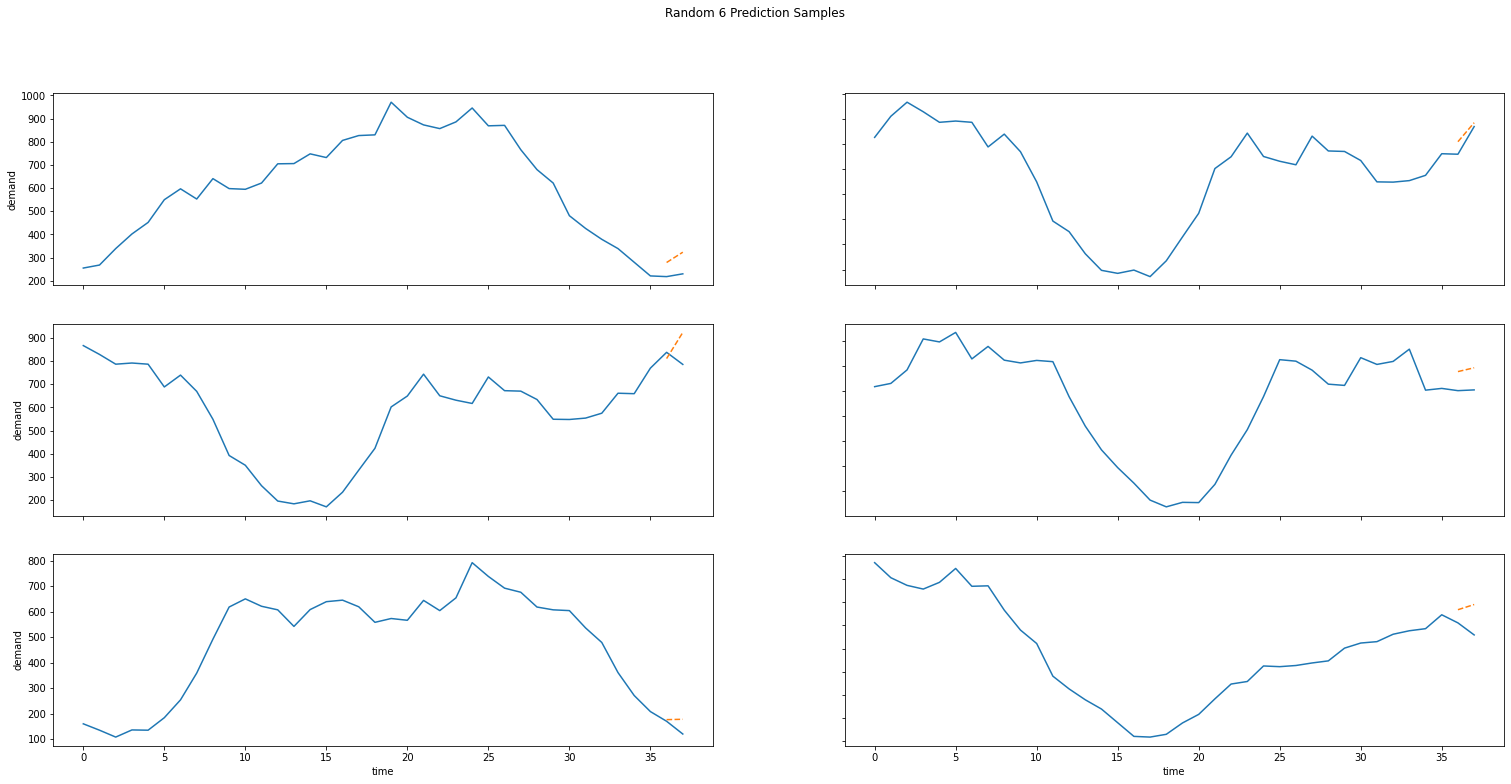

In [23]:
# Visualization
samp_test = getSample(inp_test,pred_test_out,out_test,samples=6)
visualize(samp_test)